In [2]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy


In [3]:
#create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#create a list for holding the cities
cities=[]
#identify the nearest cit;y for  each latitiude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the citty is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

577

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
#starting url fro weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1 
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    #group cities intosets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        recrd_count =1
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | timucuy
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | tevaitoa
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | hovd
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | balakhninskiy
Processing Record 17 of Set 1 | santiago del estero
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | morondava
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | sioux loo

Processing Record 185 of Set 4 | gat
Processing Record 186 of Set 4 | tuktoyaktuk
Processing Record 187 of Set 4 | severo-kurilsk
Processing Record 188 of Set 4 | krasnyy yar
Processing Record 189 of Set 4 | bengkulu
Processing Record 190 of Set 4 | shelburne
Processing Record 191 of Set 4 | palauig
Processing Record 192 of Set 4 | seoul
Processing Record 193 of Set 4 | ulaanbaatar
Processing Record 194 of Set 4 | tadine
Processing Record 195 of Set 4 | fort nelson
Processing Record 196 of Set 4 | amga
Processing Record 197 of Set 4 | deputatskiy
Processing Record 198 of Set 4 | chimbote
Processing Record 199 of Set 4 | ponerihouen
Processing Record 200 of Set 4 | zhigansk
Processing Record 201 of Set 5 | marcona
City not found. Skipping...
Processing Record 202 of Set 5 | lancut
Processing Record 203 of Set 5 | samusu
City not found. Skipping...
Processing Record 204 of Set 5 | xining
Processing Record 205 of Set 5 | jurm
Processing Record 206 of Set 5 | dingle
Processing Record 207 o

Processing Record 370 of Set 8 | broken hill
Processing Record 371 of Set 8 | nouakchott
Processing Record 372 of Set 8 | mongomo
Processing Record 373 of Set 8 | sao joao da barra
Processing Record 374 of Set 8 | yomitan
City not found. Skipping...
Processing Record 375 of Set 8 | yulara
Processing Record 376 of Set 8 | sumbe
Processing Record 377 of Set 8 | karaul
City not found. Skipping...
Processing Record 378 of Set 8 | ganzhou
Processing Record 379 of Set 8 | olavarria
Processing Record 380 of Set 8 | bubaque
Processing Record 381 of Set 8 | orlovo
Processing Record 382 of Set 8 | coquimbo
Processing Record 383 of Set 8 | ambovombe
Processing Record 384 of Set 8 | ramnagar
Processing Record 385 of Set 8 | acarau
Processing Record 386 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 387 of Set 8 | fairbanks
Processing Record 388 of Set 8 | cabo san lucas
Processing Record 389 of Set 8 | marsh harbour
Processing Record 390 of Set 8 | lavrentiya
Processing Record

Processing Record 555 of Set 12 | garwolin
Processing Record 556 of Set 12 | vestmanna
Processing Record 557 of Set 12 | byron bay
Processing Record 558 of Set 12 | isangel
Processing Record 559 of Set 12 | micheweni
Processing Record 560 of Set 12 | burkhala
City not found. Skipping...
Processing Record 561 of Set 12 | faya
Processing Record 562 of Set 12 | port moresby
Processing Record 563 of Set 12 | shrigonda
Processing Record 564 of Set 12 | kingsville
Processing Record 565 of Set 12 | rio grande
Processing Record 566 of Set 12 | port lincoln
Processing Record 567 of Set 12 | saurimo
Processing Record 568 of Set 12 | krasnyye baki
Processing Record 569 of Set 12 | miles city
Processing Record 570 of Set 12 | zhuhai
Processing Record 571 of Set 12 | clonakilty
Processing Record 572 of Set 12 | biltine
Processing Record 573 of Set 12 | alice
Processing Record 574 of Set 12 | pyapon
Processing Record 575 of Set 12 | asau
Processing Record 576 of Set 12 | miami
Processing Record 577 

In [9]:
len(city_data)

581

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,58.19,72,100,13.09,AU,2022-05-30 14:54:59
1,Timucuy,20.8167,-89.5167,84.16,65,75,16.11,MX,2022-05-30 14:54:59
2,Busselton,-33.6500,115.3333,53.78,87,1,8.12,AU,2022-05-30 14:54:59
3,Uturoa,-16.7333,-151.4333,79.66,68,93,9.71,PF,2022-05-30 14:55:00
4,Puerto Ayora,-0.7393,-90.3518,73.36,85,99,10.16,EC,2022-05-30 14:55:00
5,Tevaitoa,-16.7833,-151.5000,79.59,68,94,9.71,PF,2022-05-30 14:55:00
6,Atuona,-9.8000,-139.0333,77.79,75,89,13.56,PF,2022-05-30 14:55:01
7,Arraial Do Cabo,-22.9661,-42.0278,80.56,73,0,14.97,BR,2022-05-30 14:55:01
8,Albany,42.6001,-73.9662,78.62,63,56,2.64,US,2022-05-30 14:51:38
9,Qaanaaq,77.4840,-69.3632,26.26,79,100,7.40,GL,2022-05-30 14:55:01


In [11]:
#assign new column order
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2022-05-30 14:54:59,-33.8667,121.9000,58.19,72,100,13.09
1,Timucuy,MX,2022-05-30 14:54:59,20.8167,-89.5167,84.16,65,75,16.11
2,Busselton,AU,2022-05-30 14:54:59,-33.6500,115.3333,53.78,87,1,8.12
3,Uturoa,PF,2022-05-30 14:55:00,-16.7333,-151.4333,79.66,68,93,9.71
4,Puerto Ayora,EC,2022-05-30 14:55:00,-0.7393,-90.3518,73.36,85,99,10.16
...,...,...,...,...,...,...,...,...,...
576,Alofi,NU,2022-05-30 15:10:36,-19.0595,-169.9187,67.89,94,40,1.14
577,Maldonado,UY,2022-05-30 15:10:36,-34.6667,-54.9167,48.22,63,41,20.31
578,San Ramon,US,2022-05-30 15:06:05,37.7799,-121.9780,60.39,73,0,1.99
579,Alice Springs,AU,2022-05-30 15:10:37,-23.7000,133.8833,53.15,40,100,4.61


In [12]:
#create an output file (csv)
output_data_file="weather_data/cities.csv"
#export the city_data to aa csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#extract releveant fields from teh dataframe
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df['Humidity']
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

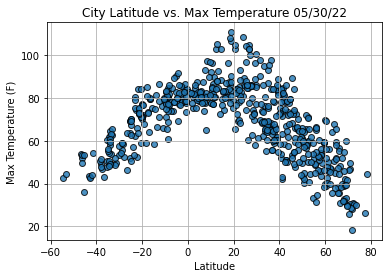

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

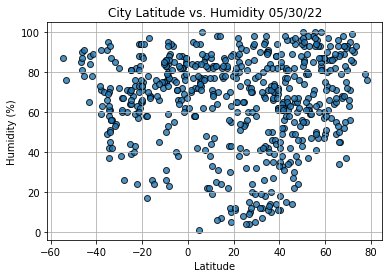

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

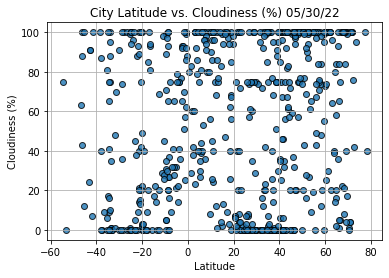

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

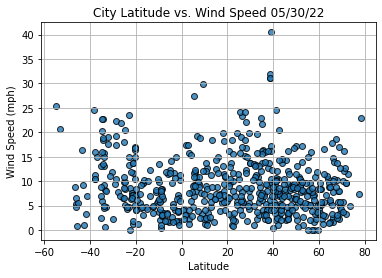

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
#import linregress form scipy
from scipy.stats import linregress

#craete a function to perfomr linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the equation of the line
    line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [19]:
index13 = city_data_df.loc[13]
index13

City                     Khatanga
Country                        RU
Date          2022-05-30 14:55:03
Lat                       71.9667
Lng                         102.5
Max Temp                    30.72
Humidity                       85
Cloudiness                     76
Wind Speed                   9.62
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
576    False
577    False
578     True
579    False
580     True
Name: Lat, Length: 581, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Timucuy,MX,2022-05-30 14:54:59,20.8167,-89.5167,84.16,65,75,16.11
8,Albany,US,2022-05-30 14:51:38,42.6001,-73.9662,78.62,63,56,2.64
9,Qaanaaq,GL,2022-05-30 14:55:01,77.4840,-69.3632,26.26,79,100,7.40
10,Hovd,MN,2022-05-30 14:55:02,48.0056,91.6419,65.26,24,99,6.55
12,Hasaki,JP,2022-05-30 14:55:02,35.7333,140.8333,66.60,84,100,16.35


In [22]:
#create a northern and southern hemisphere dataframe
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

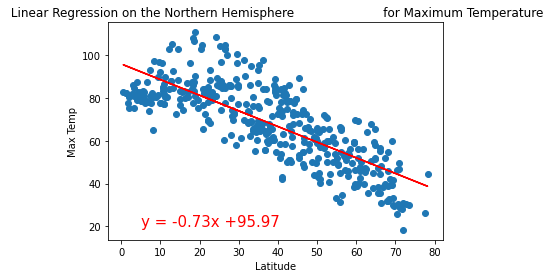

In [23]:
#linear regression on the northern hemisphere
x_values =northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                      ' Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (5,20))

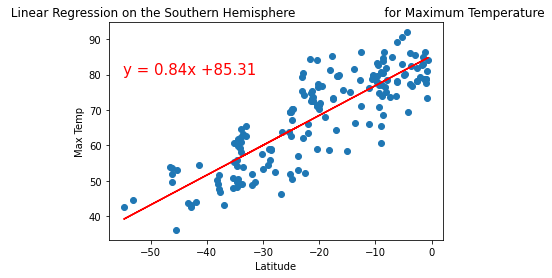

In [24]:
#linear regression on the northern hemisphere
x_values =southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                      ' Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-55,80))

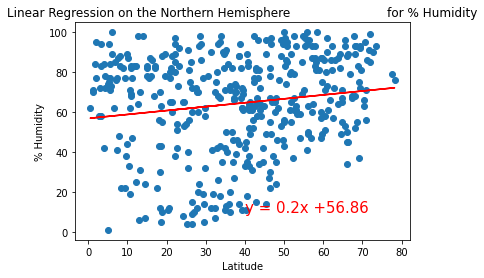

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

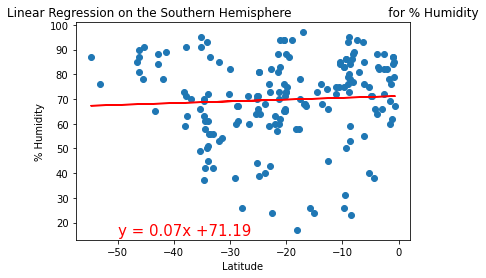

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

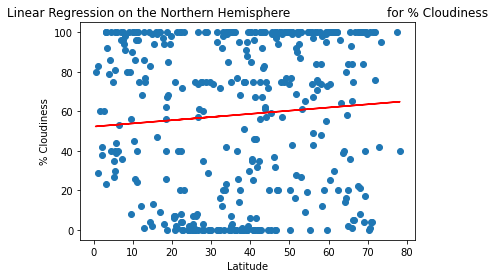

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

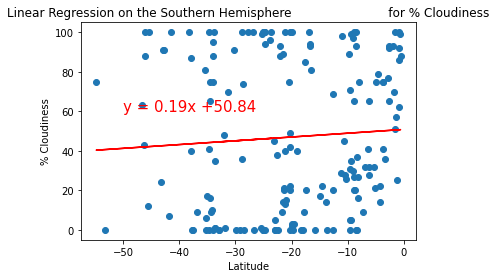

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

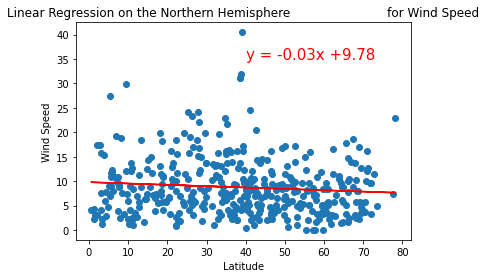

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

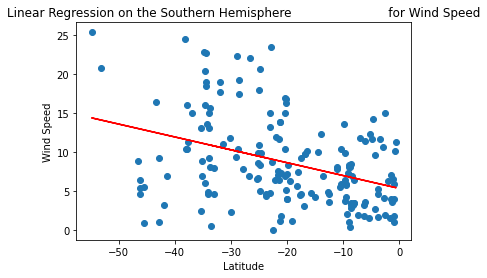

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))